<a href="https://colab.research.google.com/github/WillowStevens/pod-project/blob/main/HotelDivago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
#Load the data
df_reviews = pd.read_csv('/content/hotel_data/hotel_reviews.csv')
df_hotels = pd.read_csv('/content/hotel_data/hotel_info.csv')

In [123]:
#Clean the Data
# List of columns to check
columns = ['overall_score', 'price_score', 'location_score', 'cleanliness_score',
           'staff_score', 'communication_score', 'food_score']

# Dictionary to store the count of removed values
removed_counts = {}
initial_count = len(df_reviews)

#remove nulls and duplicates
df_reviews = df_reviews.drop_duplicates()
removed_dupes = initial_count - len(df_reviews)
initial_count = len(df_reviews)
df_reviews = df_reviews.dropna()
removed_null = initial_count - len(df_reviews)
print(f"Removed Duplicates: {removed_dupes}")
print(f"Removed Nulls: {removed_null}")
print(f"Total: {removed_dupes + removed_null}")

# Iterate over the columns
for column in columns:
    # Count the out-of-range values
    out_of_range_count = ((df_reviews[column] < 0) | (df_reviews[column] > 10)).sum()

    # Store the count in the dictionary
    removed_counts[column] = out_of_range_count

    # Replace out-of-range values with NaN
    df_reviews[column] = df_reviews[column].where((df_reviews[column] >= 0) & (df_reviews[column] <= 10))

print("Number of out of range values:")
for column, count in removed_counts.items():
    print(f"{column}: {count}")
df_reviews = df_reviews.dropna()

Removed Duplicates: 385
Removed Nulls: 121
Total: 506
Number of out of range values:
overall_score: 0
price_score: 0
location_score: 0
cleanliness_score: 92
staff_score: 82
communication_score: 0
food_score: 0


In [ ]:
#merge the datasets
df = pd.merge(df_reviews, df_hotels, left_on='hotel', right_on='ID')

In [ ]:
#select relevant columns
df_scores = df[['overall_score', 'price_score', 'location_score','cleanliness_score','staff_score','communication_score','food_score']]

In [ ]:
#calculate the correlation matrix
correlation_matrix = df_scores.corr()

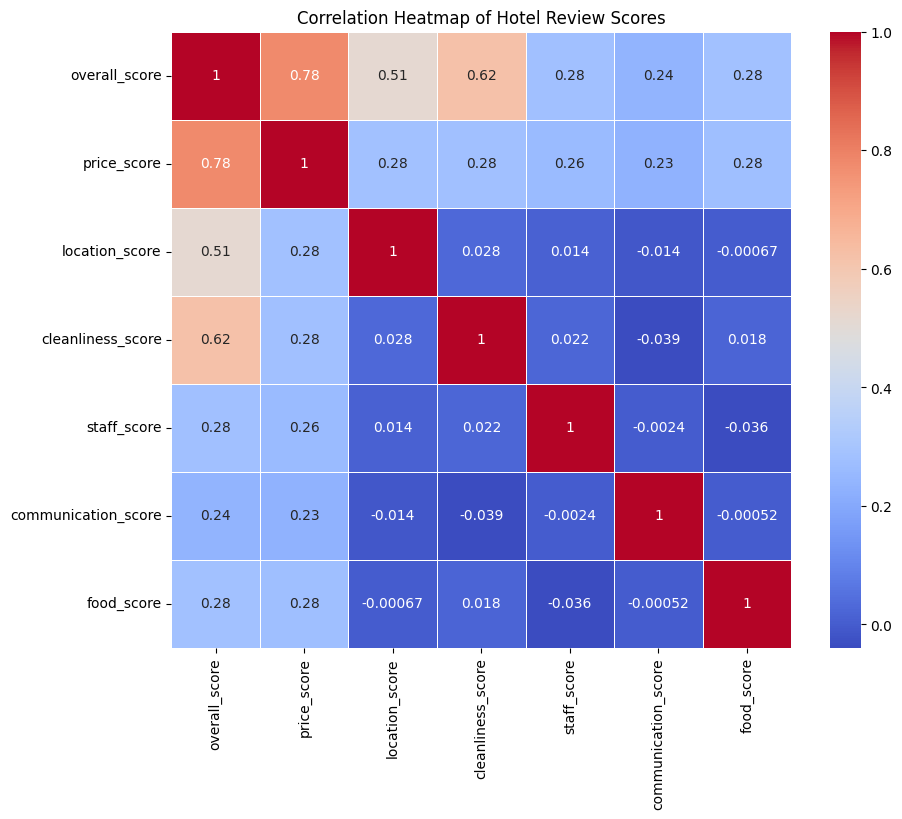

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap ='coolwarm',linewidths=0.7)
plt.title('Correlation Heatmap of Hotel Review Scores')
plt.show()

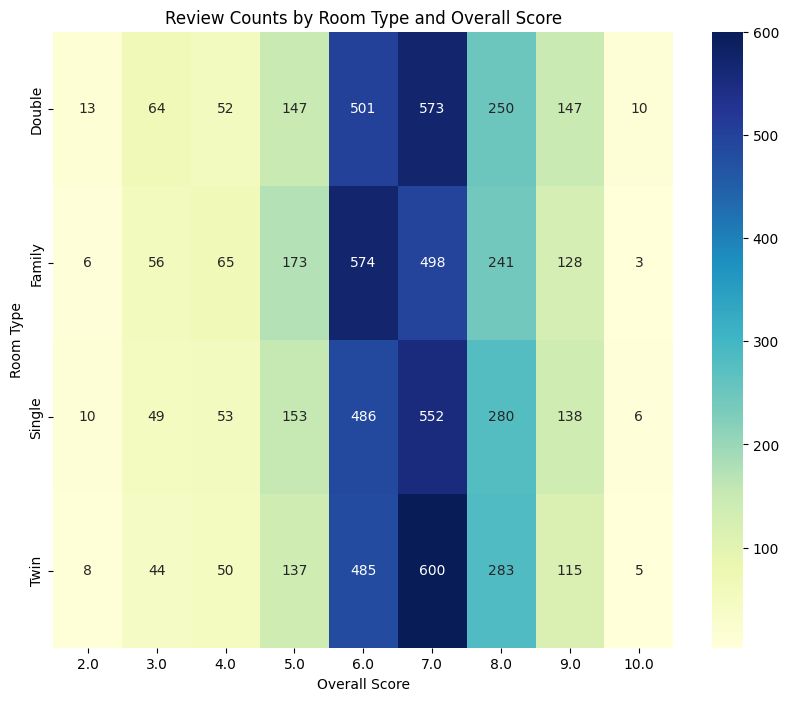

In [ ]:
review_counts = pd.crosstab(df['room_type'], df['overall_score'])

plt.figure(figsize=(10, 8))
sns.heatmap(review_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Review Counts by Room Type and Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Room Type')
plt.show()

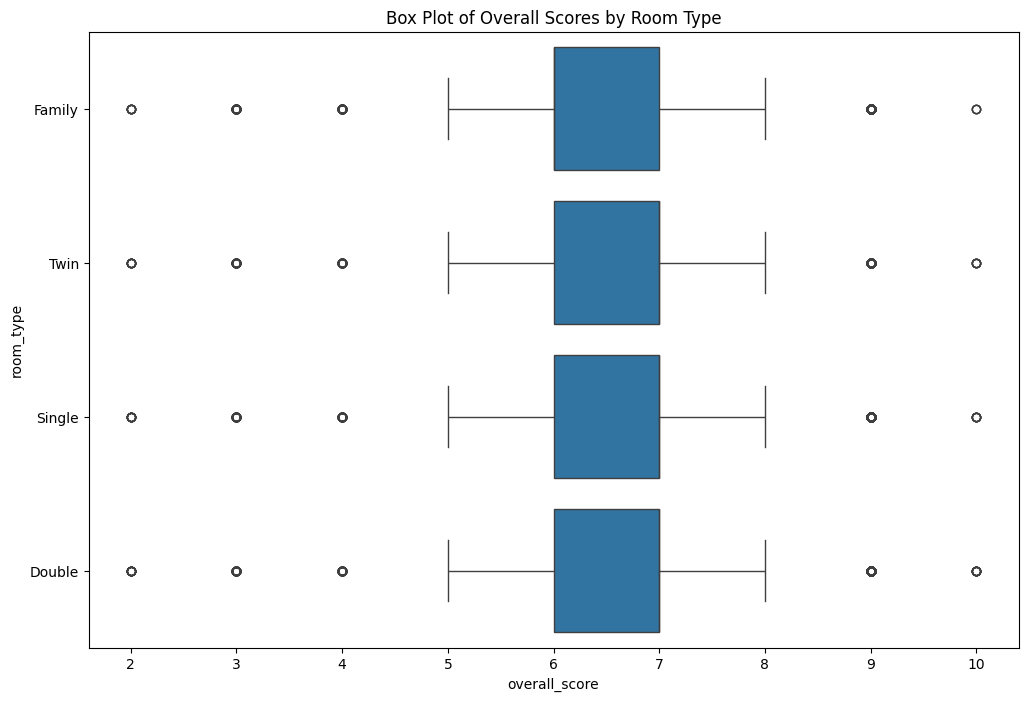

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='overall_score', y='room_type', data=df)
plt.title('Box Plot of Overall Scores by Room Type')
plt.show()

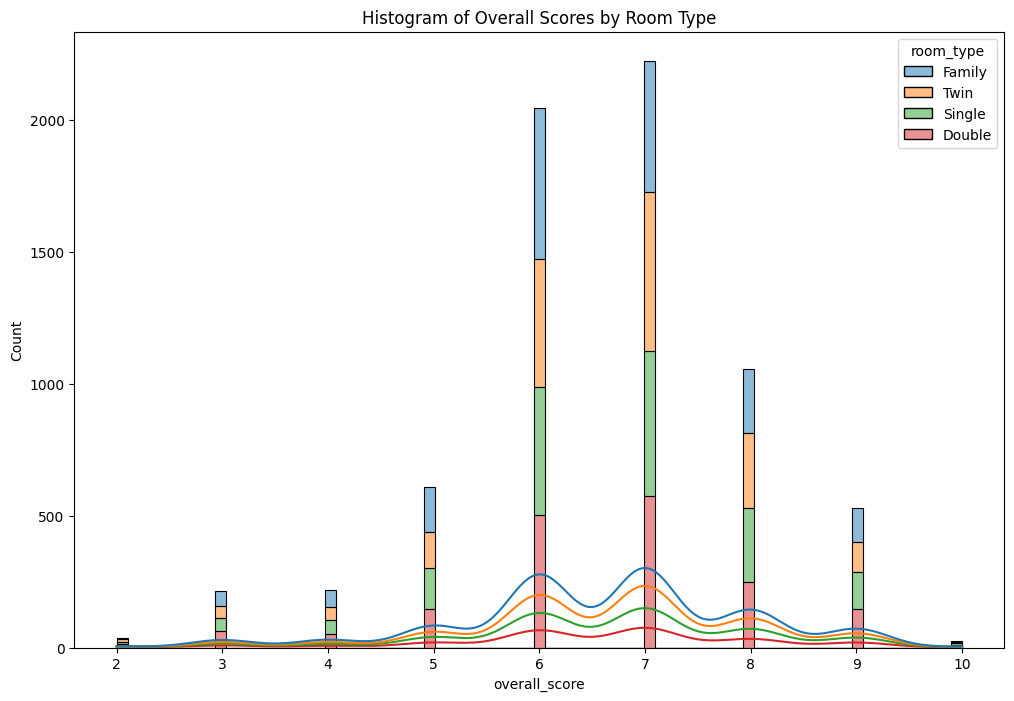

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='overall_score', hue='room_type', multiple='stack', kde=True)
plt.title('Histogram of Overall Scores by Room Type')
plt.show()

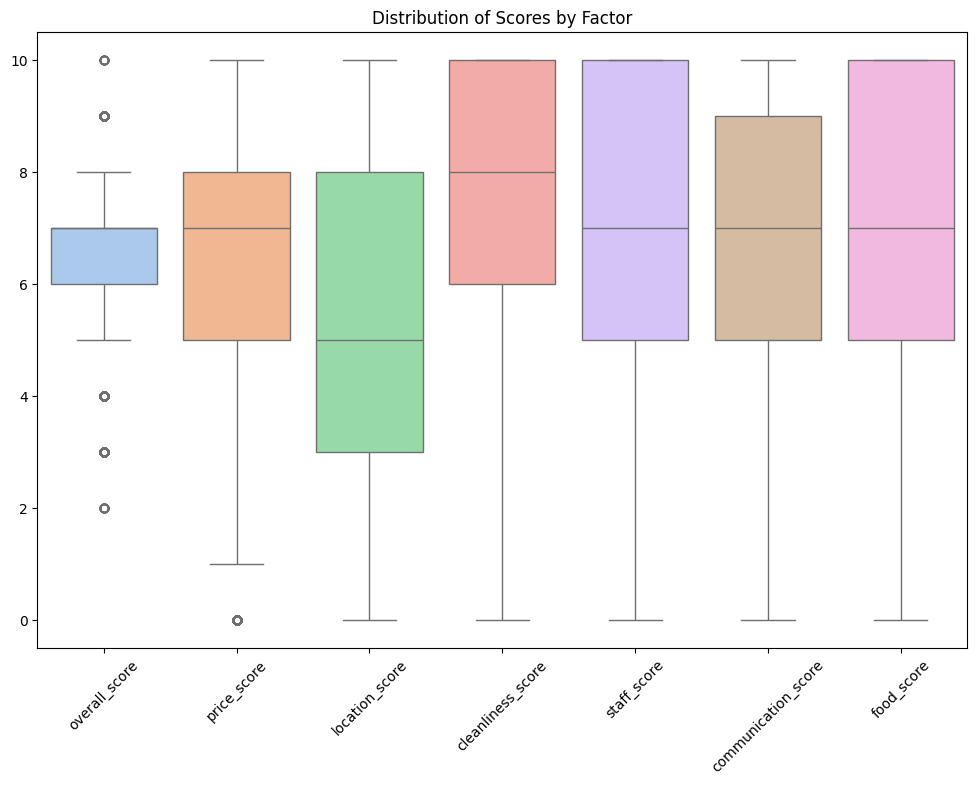

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scores, palette='pastel')
plt.title('Distribution of Scores by Factor')
plt.xticks(rotation=45)
plt.show()

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


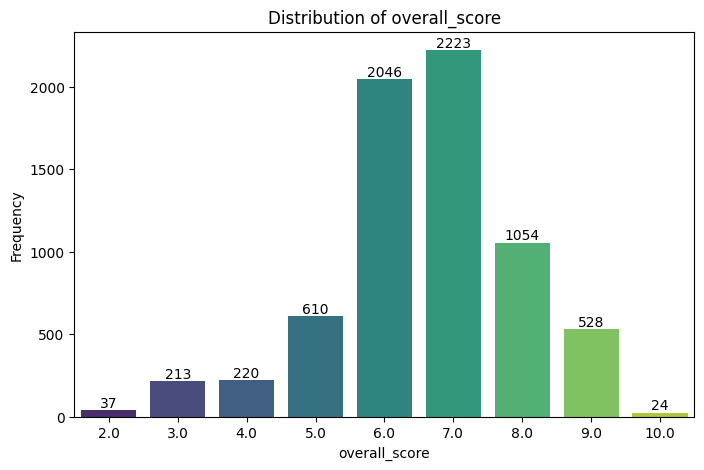

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


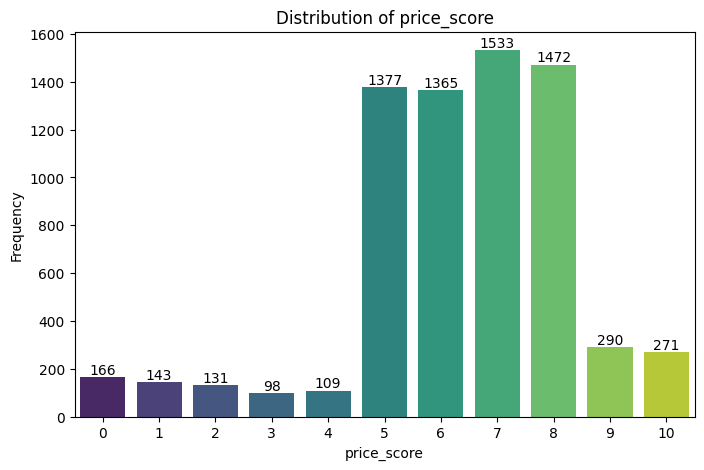

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


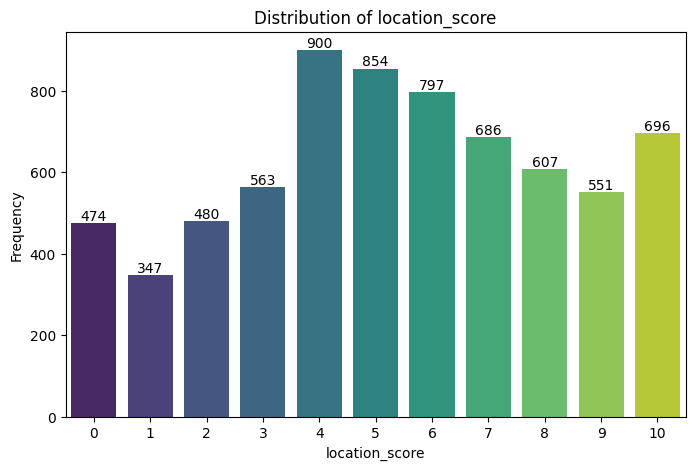

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


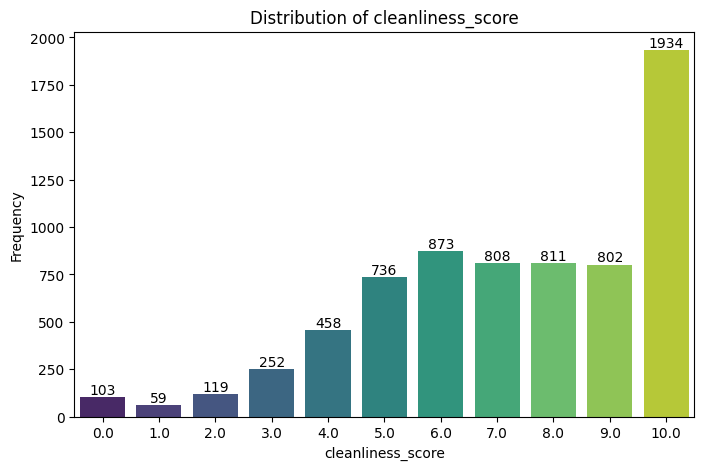

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


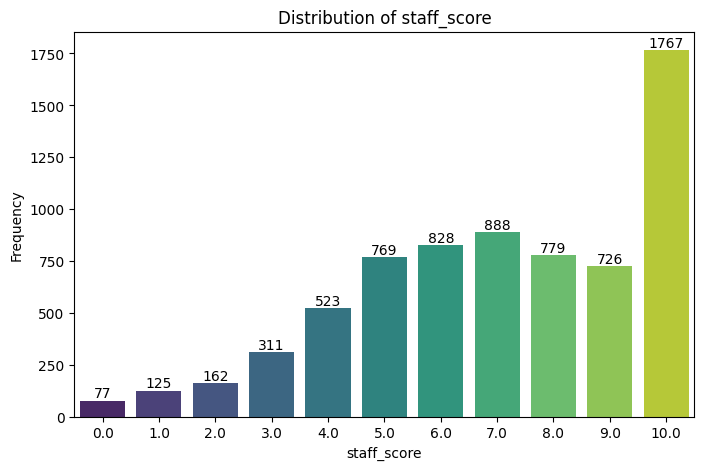

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


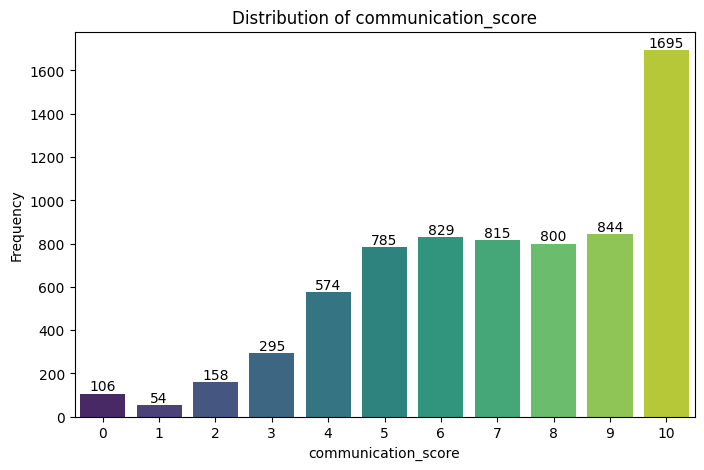

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


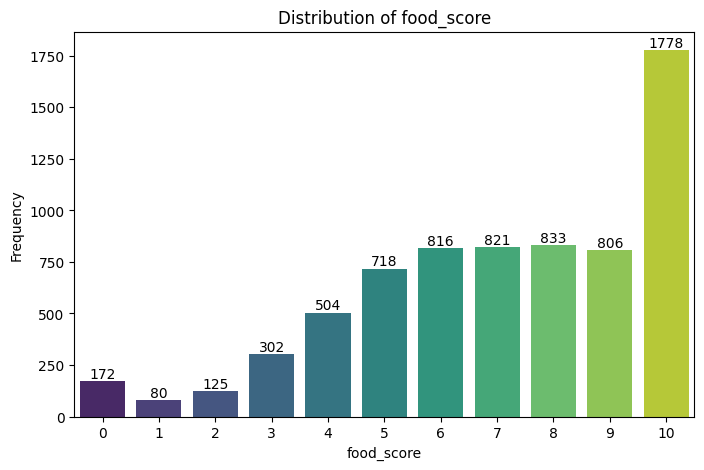

In [ ]:
for column in columns:
    plt.figure(figsize=(8, 5))

    # Get the value counts sorted by index to ensure alignment with barplot
    value_counts = df[column].value_counts().sort_index()

    # Create the bar plot with sorted index
    sns.barplot(x=value_counts.index,
                y=value_counts.values,
                palette="viridis")

    # Add the text annotations on top of the bars
    for index, value in enumerate(value_counts.values):
        plt.text(index, value, str(value), ha='center', va='bottom')

    # Set the title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

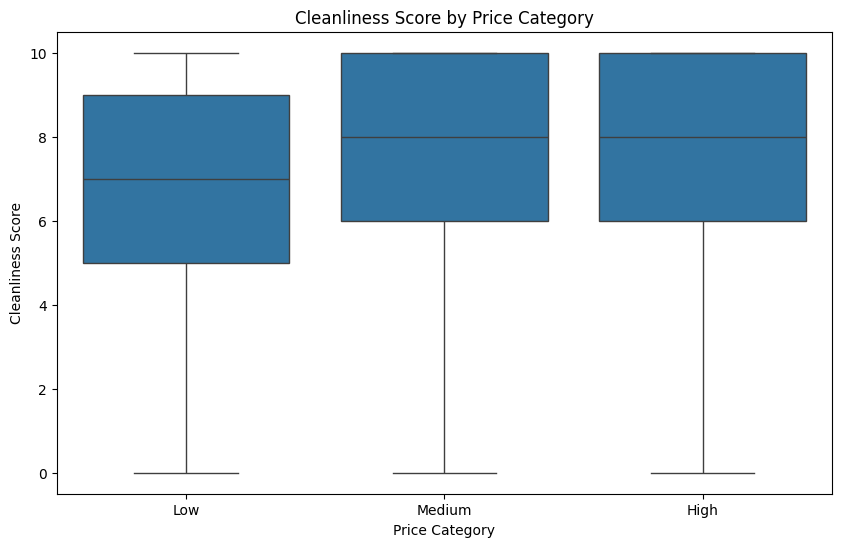

In [127]:
df['price_category'] = pd.qcut(df['price_score'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='cleanliness_score', data=df)
plt.title('Cleanliness Score by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Cleanliness Score')
plt.show()

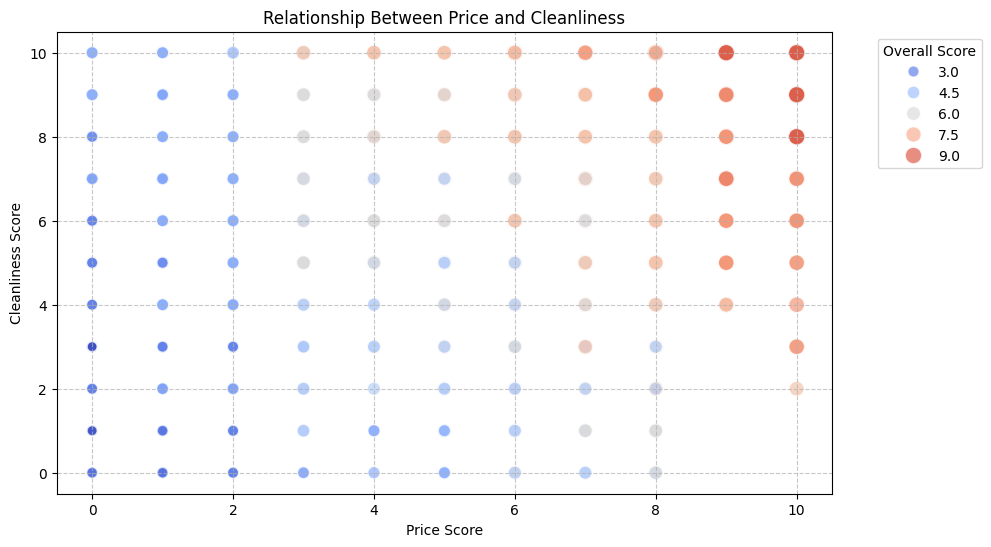

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_score', y='cleanliness_score', data=df, hue='overall_score', palette='coolwarm', size='overall_score', sizes=(50, 150), alpha=0.7)
plt.title('Relationship Between Price and Cleanliness')
plt.xlabel('Price Score')
plt.ylabel('Cleanliness Score')
plt.legend(title='Overall Score', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()